### 决策边界可视化

(500, 500)


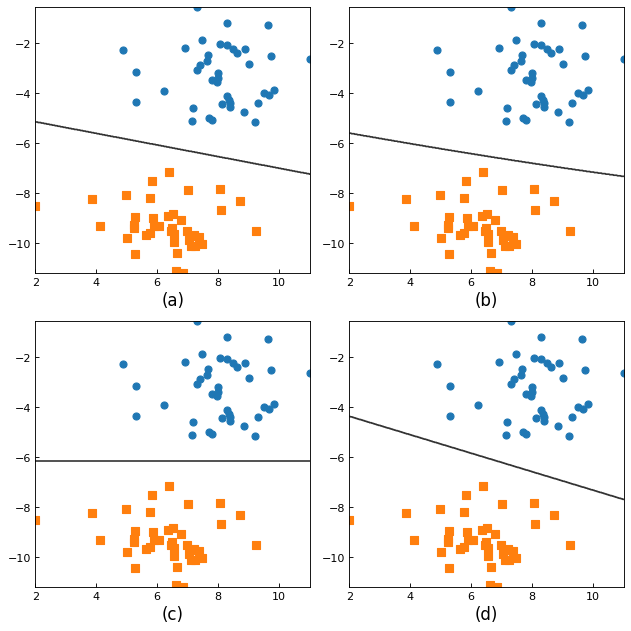

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs


def decision_boundary():
    # 构造数据
    X, y = make_blobs(n_samples=80, centers=2, cluster_std=1.2, random_state=6)
    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    data = []
    for i in range(len(X)):
        index = np.where(y == i)[0]
        data.append(X[index, :])

    plt.figure(figsize=(8, 8), dpi=80)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.subplot(2, 2, 1)
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)
    clf = LogisticRegression()
    clf.fit(X, y)
    Z = clf.predict(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.8,
                linestyles=['-', '-', '--'])
    plt.xlabel('(a)', fontsize=15)

    plt.subplot(2, 2, 2)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)
    clf = GaussianNB()
    clf.fit(X, y)
    Z = clf.predict(xy).reshape(XX.shape)

    # print(z.shape)

    plt.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.8,
                linestyles=['-', '-', '--'])
    plt.xlabel('(b)', fontsize=15)

    plt.subplot(2, 2, 3)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)
    clf = DecisionTreeClassifier()
    clf.fit(X, y)
    Z = clf.predict(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.8,
                linestyles=['-', '-', '--'])
    plt.xlabel('(c)', fontsize=15)

    plt.subplot(2, 2, 4)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.scatter(data[0][:, 0], data[0][:, 1], marker='o', s=40)
    plt.scatter(data[1][:, 0], data[1][:, 1], marker='s', s=40)
    clf = svm.SVC(kernel='linear', C=1000)
    clf.fit(X, y)
    # plot the decision function
    Z = clf.predict(xy).reshape(XX.shape)
    print(Z.shape)
    # plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='black', levels=[-1, 0, 1], alpha=0.8,
                linestyles=['-', '-', '--'])
    plt.xlabel('(d)', fontsize=15)
    # plot support vectors
    # plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
    #            linewidth=1, facecolors='none', edgecolors='k')
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    decision_boundary()
